## Import Libraries

In [ ]:
import lightgbm as lgb
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import classification_report

## Download Dataset

In [ ]:
digits = load_digits()

## Explore Dataset

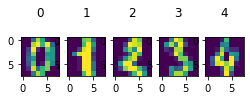

In [ ]:
plt.figure(figsize=(4,4))
for value, (images, labels) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, value + 1)
    plt.imshow(np.reshape(images, (8,8)))
    plt.title('%i\n' % labels)

## Split Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.01, random_state=0)
X_train,X_train_2, y_train, X_test_2 = train_test_split(digits.data, digits.target, test_size=0.5, random_state=0)

## Set Parameters for LightGBM Model

In [ ]:
params={}
params['learning_rate']=0.04
params['boosting_type']='gbdt' 
params['objective']='multiclass'
params['metric']='multi_logloss'
params['max_depth']=10
params['num_class']=10 

## Create LightGBM Dataset

In [ ]:
training_dataset=lgb.Dataset(X_train, label=y_train)
testing_dataset=lgb.Dataset(X_test, label=y_test)
retrain_dataset=lgb.Dataset(X_train_2, label=X_test_2)

## Model Training and Prediction

In [ ]:
classifier=lgb.train(params,training_dataset,100)
y_predictions=classifier.predict(X_test)
y_predictions[:5]

array([[0.00405166, 0.00658429, 0.95409323, 0.00627828, 0.00469164,
        0.00338217, 0.00416245, 0.0046908 , 0.00748076, 0.00458471],
       [0.00455854, 0.00466347, 0.00469425, 0.0114405 , 0.01377625,
        0.00546154, 0.00578554, 0.00513445, 0.93873706, 0.00574841],
       [0.00290678, 0.00321077, 0.96361602, 0.00319144, 0.00337572,
        0.00966767, 0.00298332, 0.00325026, 0.00335516, 0.00444285],
       [0.01612169, 0.01642146, 0.01541224, 0.01630892, 0.02338259,
        0.03986833, 0.79762928, 0.0181264 , 0.03451398, 0.02221512],
       [0.00349806, 0.00364628, 0.00337764, 0.00357948, 0.00451804,
        0.00561582, 0.96502438, 0.00397238, 0.00328345, 0.00348446]])

## Rounding Predictions

In [ ]:
y_predictions_2 = [np.argmax(value) for value in y_predictions]
y_predictions_2[:10]

[2, 8, 2, 6, 6, 7, 1, 9, 8, 5]

## Classfication Report

In [ ]:
print(classification_report(y_predictions_2,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



## Save LightGBM Model 

In [ ]:
classifier.save_model('lightgbclassifier.txt')

## Load Saved Model 

In [ ]:
model = lgb.Booster(model_file='lightgbclassifier.txt')

In [ ]:
print("Current Iteration# %d" %model.current_iteration())

Option 1 current iter# 100


## Retrain Model

In [ ]:
claasifier_retrain = lgb.train(params, retrain_dataset, num_boost_round = 100,
                init_model=model)

In [ ]:
print("Retrained Model Iteration# %d" %claasifier_retrain.current_iteration())

Retrained Model Iteration# 200


## Feature Importance

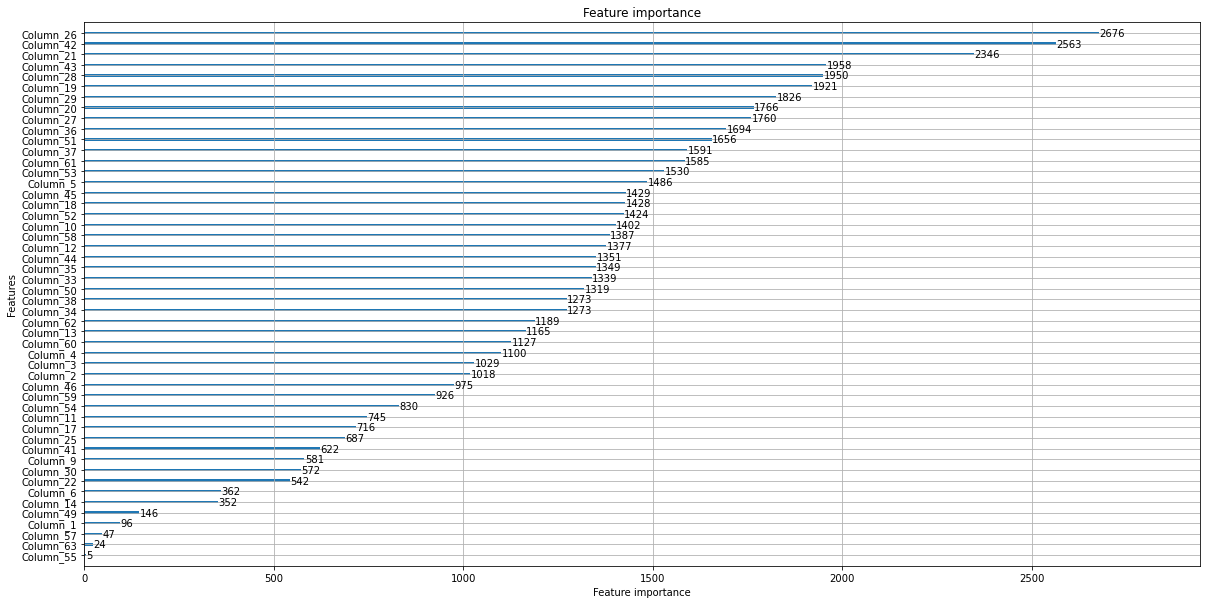

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
lgb.plot_importance(claasifier_retrain,ax=ax)